# Numpy

In [ ]:
"""
Look at the reference, specifically in the array creation routines,

#np.1 Create a null vector of size 10
#np.2 Create a 3x3 matrix with values ranging from 0 to 8
#np.3 Create a random vector of size 30 and find the mean value
#np.4 Normalize a 5x5 random matrix
    ## (X - Xmin)/(Xmax - Xmin)
    ###EXTRA Normalize every row
    ###EXTRA Normalize every column
#np.5 Create a 5x5 matrix with row values ranging from 0 to 4 (use broadcasting!)
#np.6 Looking at the docs: if a= np.array([1,2]) and b= np.array([3,4]), why do np.dot(a,b) is equal to np.dot(b,a)?
#np.7 Following np.6, if aq= np.array([[1,2],[2,4]]) and bq= np.array([[9,12],[12,16]]), why do np.dot(aq,bq) is different from np.dot(bq,aq)?

"""

In [7]:

import numpy as np

#np.1
print(np.zeros(10))

#np.2
print(np.arange(9).reshape((3,3)))

#np.3 
print(np.random.random(30).mean())

#np.4 (each column gets normalized ALONG ROWS (axis=0) )
mat = np.random.random((5,5))
m = mat.min(axis=0)
M = mat.max(axis=0)
print((mat - m)/(M - m))

#np.5
print(np.zeros((5,5)) + np.arange(5))

#np.6
#1D: dot product
#2D: matrix multiplication
##1D outer product? np.outer(v, v)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
0.437502131179
[[ 0.31213986  0.2634284   0.          0.57093852  0.46910856]
 [ 1.          0.02363428  1.          0.4173316   0.        ]
 [ 0.          0.68598693  0.86484765  1.          0.98592683]
 [ 0.65138727  1.          0.94344722  0.          1.        ]
 [ 0.22073486  0.          0.16211636  0.66083382  0.57723033]]
[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]


# List comprehensions

In [ ]:
"""
#lc.1 Using a list comprehension, count how many elements in the file ../les4/4_results.tsv have an APSI > 94 (940)
#lc.2 Retrieve all the (not empty) lines in ire_out.txt that are above #OtherMatches then, using a list comprehension:
    ## select all the fourth fields, and plot the resulting array as an histogram, it shall have a peak around the value of 3
#lc.3 Solve the following zebra puzzle:
    ## 3 houses in a row 
    
    ## The house with the console Ps4 is next to the orange house
    ## The brown house is inhabited by someone who lives far from the Italian guy
    ## The console XboxOne is not used by the Russian
    ## Who owns the console Switch lives in a purple house
    WHERE DOES THE ALIEN LIVE? (first, second or third house?)
"""

In this dataset, 940 elements have an APSI > 94


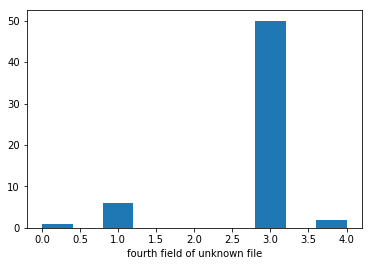

We got a total of 2 possible solution(s)
The ALIEN can be in house 2
The ALIEN can be in house 2


In [31]:
#lc.1
myCount=0
with open("../les4/4_results.tsv") as f:
    myData=[line for line in f if not line.startswith("method") if int(line.split()[2]) > 94]
    myCount=len(myData)
print("In this dataset, {} elements have an APSI > 94".format(myCount))
    
#lc.2
import matplotlib.pyplot as plt
futureHist=[]
with open("ire_out.txt") as f:
    lines=[]
    line=f.readline()
    
    while(line and line!="\n"):
        lines.append(line.strip())
        line=f.readline()
    futureHist=[int(l.split()[3]) for l in lines]

fig,ax=plt.subplots()
ax.hist(futureHist)
ax.set_xlabel('fourth field of unknown file')
plt.show()

#lc.3
import itertools as it
houses = [1,2,3]
orderings = list(it.permutations(houses))

solution = [(ALIEN)
           for (brown, purple, orange) in orderings
           for (ps4, switch, xboxone) in orderings
           for (italian, russian, ALIEN) in orderings
           if abs(ps4 - orange) == 1
           if abs(brown - italian) == 2
           if xboxone != russian
           if switch == purple
           ]
print("We got a total of {} possible solution(s)".format(len(solution)))
for alienHouse in solution:
    print("The ALIEN can be in house {}".format(alienHouse))



In [ ]:
plt.close()

# Pandas

In [ ]:
"""
#pd.1 Try to build a basic SVM classifier from the IRIS dataset (see sklearn.datasets) to distinguish Iris Setosa from other species
#pd.2 Get the 4_results.tsv file again: how many observations(rows) are there for each method?
#pd.3 Plot the SCI column, with the APSI as independent variable, for the method mafftx and k=3
#pd.4 create a new column called SPI which is the product of SPS and SCI
#pd.5 create a function that, given a Series, computes the zscore z=(X - mean)/std and returns the mean of those z
#pd.6 use the column created in pd.4 and send to the function created in pd.5 the following Series:
    ## SPI values < 0.25
    ## SPI values >= 0.25 and <0.50
    ## SPI values >= 0.50
    Each of these will return a single value (the mean z-score): add them and report the final sum. (Don't do anything manually)
#pd.7 group the df by k, and print the mean SPS value, regardless of the method
"""

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Cross-validation mean accuracy: 0.9533333333333334


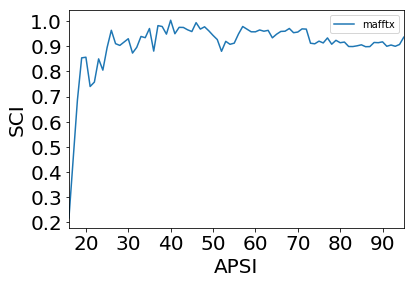

6.305581068376801e-15
-7.585769229206936e-15
-2.904465715648576e-14
k   method  
2   beagles     0.674952
    mafftx      0.699342
    mlocarna    0.727271
    raf         0.684382
    sparse      0.591691
3   beagles     0.580453
    mafftx      0.671903
    mlocarna    0.532021
    raf         0.648220
    sparse      0.416573
5   beagles     0.397985
    mafftx      0.661675
    mlocarna    0.457650
    raf         0.612816
    sparse      0.345768
7   beagles     0.359087
    mafftx      0.646378
    mlocarna    0.445082
    raf         0.584062
    sparse      0.326775
10  beagles     0.345154
    mafftx      0.644726
    mlocarna    0.446814
    raf         0.573419
    sparse      0.315699
15  beagles     0.331704
    mafftx      0.622210
    mlocarna    0.436592
    raf         0.542739
    sparse      0.309154
Name: SPS, dtype: float64


In [87]:

#pd.1
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import KFold

iris=load_iris()
print(iris.keys()) #dictionary like, check the keys

df=pd.DataFrame(iris.data, columns=iris.feature_names)
target= iris.target #target labels

kf = KFold(n_splits=10)
scores=[]
for train_index, test_index in kf.split(df):

    svm=SVC()
    svm.fit(df.iloc[train_index], target[train_index])
    scores.append(svm.score(df.iloc[test_index], target[test_index]))


scores=np.array(scores)
print("Cross-validation mean accuracy: {}".format(scores.mean()))

#pd.2
df=pd.read_table("../les4/4_results.tsv", sep="\t")
df.method.value_counts()

#pd.3
fig, ax=plt.subplots()
df[df.method == "mafftx"].groupby(['APSI']).mean().plot(y='SCI', ax=ax, label="mafftx", fontsize=20)
ax.set_ylabel("SCI", fontsize=20)
ax.set_xlabel("APSI", fontsize=20)

plt.show()

#pd.4
df['SPI']=df.SPS * df.SCI

#pd.5
def zscore(series):
    zs=(series - series.mean())/series.std()
    return zs.mean()

#pd.6 
mask1 = df.SPI < 0.25
mask2 = (df.SPI >= 0.25) & (df.SPI<0.50) #the parentheses are needed for a multiple-conditions mask
mask3 = df.SPI >= 0.50

print(zscore(df[mask1].SPI))
print(zscore(df[mask2].SPI))
print(zscore(df[mask3].SPI))

#pd.7
print(df.groupby(['k']).SPS.mean())